In [1]:
import pandas as pd
data=pd.read_csv("Homestays_Data(in).csv")

In [2]:
data

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [3]:
data.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

# feature Engineering

In [4]:
from datetime import datetime
# Convert 'host_since' and 'last_review' columns to datetime
data['host_since'] = pd.to_datetime(data['host_since'])
data['last_review'] = pd.to_datetime(data['last_review'])

# Calculate Host_Tenure
current_date = datetime.now()
data['Host_Tenure'] = (current_date - data['host_since']).dt.days / 365

# Generate Amenities_Count
data['Amenities_Count'] = data['amenities'].apply(lambda x: len(x.split(',')))

# Determine Days_Since_Last_Review
data['Days_Since_Last_Review'] = (current_date - data['last_review']).dt.days



In [5]:
data

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,Host_Tenure,Amenities_Count,Days_Since_Last_Review
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,12.117808,9,2848.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,6.882192,15,2416.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,7.531507,19,2425.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0,9.052055,15,NaN
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,9.186301,12,2660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206,1.0,1.0,11.123288,1,NaN
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0,8.010959,16,2577.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206,2.0,2.0,12.339726,31,2429.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0,6.635616,15,NaN


In [6]:
data['Days_Since_Last_Review'].isna().sum()

15827

In [7]:
data['Host_Tenure'] = data['Host_Tenure'].round(2)  # Round to two decimal places
data['Days_Since_Last_Review'].fillna((current_date - data['last_review'].min()).days, inplace=True)  # Replace NaN with the maximum value


In [8]:
data

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,Host_Tenure,Amenities_Count,Days_Since_Last_Review
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,12.12,9,2848.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,6.88,15,2416.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,7.53,19,2425.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0,9.05,15,5583.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,9.19,12,2660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206,1.0,1.0,11.12,1,5583.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0,8.01,16,2577.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206,2.0,2.0,12.34,31,2429.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0,6.64,15,5583.0


# EDA

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'log_price' to numerical type if it's not already
data['log_price'] = pd.to_numeric(data['log_price'], errors='coerce')

# Correlation Matrix
correlation_matrix = data.corr()

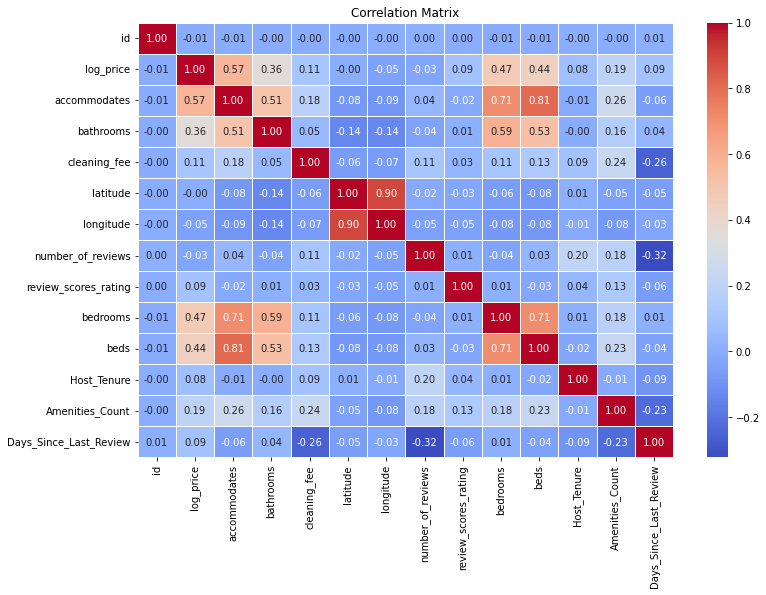

In [10]:
# Plotting Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


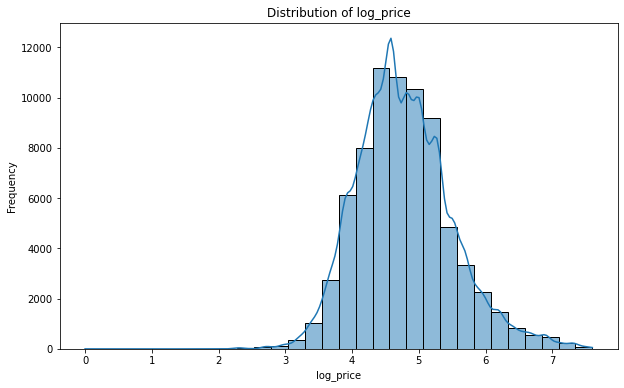

In [11]:
# Histogram for Distribution Analysis of log_price
plt.figure(figsize=(10, 6))
sns.histplot(data['log_price'], bins=30, kde=True)
plt.title('Distribution of log_price')
plt.xlabel('log_price')
plt.ylabel('Frequency')
plt.show()


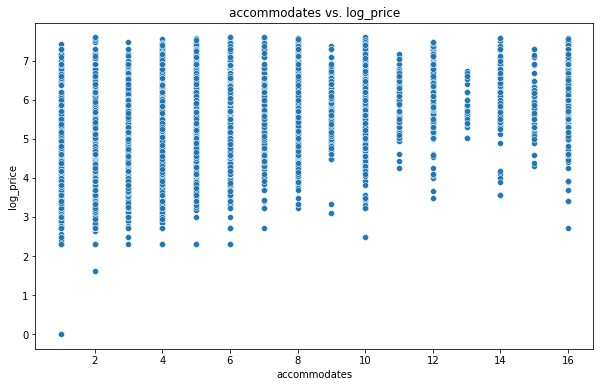

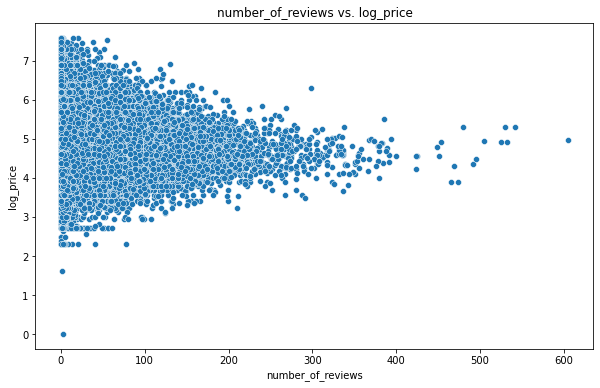

In [12]:
# Scatter plot for Numerical Features vs. log_price
numerical_features = ['accommodates', 'number_of_reviews']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[feature], y=data['log_price'])
    plt.title(f'{feature} vs. log_price')
    plt.xlabel(feature)
    plt.ylabel('log_price')
    plt.show()

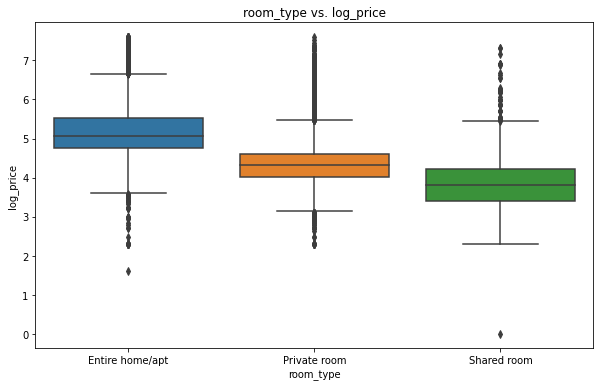

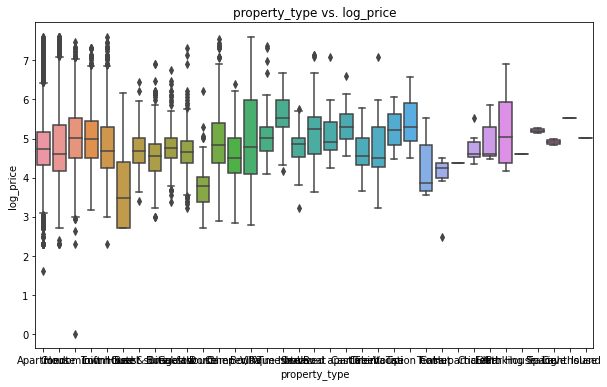

In [13]:
# Box plot for Categorical Features vs. log_price
categorical_features = ['room_type', 'property_type']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature], y=data['log_price'])
    plt.title(f'{feature} vs. log_price')
    plt.xlabel(feature)
    plt.ylabel('log_price')
    plt.show()


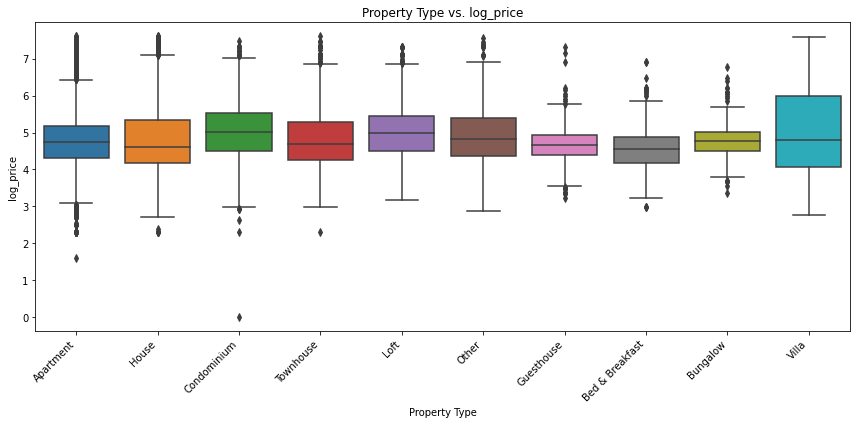

In [14]:
# Limit the number of property types for better visualization
top_property_types = data['property_type'].value_counts().nlargest(10).index.tolist()
homestays_df = data[data['property_type'].isin(top_property_types)]

# Box plot for Property Type vs. log_price
plt.figure(figsize=(12, 6))
sns.boxplot(x='property_type', y='log_price', data=data, order=top_property_types)
plt.title('Property Type vs. log_price')
plt.xlabel('Property Type')
plt.ylabel('log_price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [15]:
log_price_correlation = correlation_matrix['log_price'].drop('log_price')

In [16]:
log_price_correlation

id                       -0.007178
accommodates              0.567574
bathrooms                 0.355420
cleaning_fee              0.111191
latitude                 -0.002193
longitude                -0.047529
number_of_reviews        -0.032470
review_scores_rating      0.091219
bedrooms                  0.473212
beds                      0.442153
Host_Tenure               0.078333
Amenities_Count           0.194528
Days_Since_Last_Review    0.091750
Name: log_price, dtype: float64

# Geosapitial Analysis

In [17]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 100.0/100.0 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 133.2/133.2 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 82.0/82.0 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.


In [18]:
import folium
from folium.plugins import MarkerCluster
# Convert 'log_price' to numerical type if it's not already
data['log_price'] = pd.to_numeric(data['log_price'], errors='coerce')

In [19]:
# Create a map centered around the mean latitude and longitude
mean_lat = data['latitude'].mean()
mean_lon = data['longitude'].mean()
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=10)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each listing
for index, row in data.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=f"Price: ${row['log_price']:.2f}").add_to(marker_cluster)


In [20]:
# Display the map
m.save('homestay_map.html')  # Save the map as an HTML file


# Sentiment Analysis on Textual Data

In [21]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 626.3/626.3 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 1.5/1.5 MB 6.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [22]:
from textblob import TextBlob

# Function to calculate sentiment score
def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to 'description' column
data['description_sentiment'] = data['description'].apply(calculate_sentiment)


In [23]:
data

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,Host_Tenure,Amenities_Count,Days_Since_Last_Review,description_sentiment
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,12.12,9,2848.0,0.716667
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,6.88,15,2416.0,0.250000
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,7.53,19,2425.0,0.274085
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0,9.05,15,5583.0,0.281515
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,4,40.0,NaN,20009,0.0,1.0,9.19,12,2660.0,0.196795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206,1.0,1.0,11.12,1,5583.0,0.600000
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0,8.01,16,2577.0,0.174256
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206,2.0,2.0,12.34,31,2429.0,0.229167
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0,6.64,15,5583.0,0.320370


# ameneties Analysis

In [24]:
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import pearsonr

# Convert amenities from string to list
data['amenities'] = data['amenities'].apply(lambda x: x.strip('{}').replace('"', '').split(','))

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Create a binary matrix for amenities
amenities_matrix = mlb.fit_transform(data['amenities'])

# Create a DataFrame for the binary matrix
amenities_df = pd.DataFrame(amenities_matrix, columns=mlb.classes_)

# Concatenate the amenities DataFrame with the original DataFrame
data = pd.concat([data, amenities_df], axis=1)



In [25]:
# Calculate correlations between amenities and log_price
amenities_correlations = {}
for amenity in amenities_df.columns:
    correlation, _ = pearsonr(data[amenity], data['log_price'])
    amenities_correlations[amenity] = correlation

# Sort amenities by correlation coefficient
amenities_correlations = dict(sorted(amenities_correlations.items(), key=lambda item: item[1], reverse=True))

In [28]:
# Print top correlated amenities
print("Top Amenities Associated with Higher Prices:")
for amenity, correlation in amenities_correlations.items():
    if correlation > 0:
        print(f"{amenity}: {correlation:.2f}")


Top Amenities Associated with Higher Prices:
Family/kid friendly: 0.29
TV: 0.26
Cable TV: 0.24
Dryer: 0.17
Indoor fireplace: 0.17
Washer: 0.17
Doorman: 0.12
Hair dryer: 0.12
Suitable for events: 0.12
Private entrance: 0.11
Gym: 0.11
Iron: 0.11
24-hour check-in: 0.11
Heating: 0.10
Kitchen: 0.10
Elevator: 0.10
Shampoo: 0.09
Internet: 0.09
Laptop friendly workspace: 0.09
Self Check-In: 0.09
Pets allowed: 0.08
Dishwasher: 0.08
Fire extinguisher: 0.08
Wheelchair accessible: 0.08
Pack ’n Play/travel crib: 0.08
Bathtub: 0.08
Carbon monoxide detector: 0.07
Pool: 0.07
Hot tub: 0.07
Crib: 0.06
High chair: 0.06
Children’s books and toys: 0.06
Buzzer/wireless intercom: 0.06
Children’s dinnerware: 0.05
Air conditioning: 0.05
Essentials: 0.05
Stair gates: 0.05
Free parking on premises: 0.05
Room-darkening shades: 0.05
Babysitter recommendations: 0.05
Coffee maker: 0.05
Lockbox: 0.05
Smoke detector: 0.05
Safety card: 0.04
Oven: 0.04
Patio or balcony: 0.04
Hangers: 0.04
Fireplace guards: 0.04
Cooking 

In [29]:
# Print bottom correlated amenities
print("\nTop Amenities Associated with Lower Prices:")
for amenity, correlation in amenities_correlations.items():
    if correlation < 0:
        print(f"{amenity}: {correlation:.2f}")



Top Amenities Associated with Lower Prices:
Paid parking off premises: -0.00
Accessible-height toilet: -0.00
Wide clearance to shower and toilet: -0.00
Fixed grab bars for shower & toilet: -0.00
Other: -0.00
Private bathroom: -0.00
First aid kit: -0.00
Air purifier: -0.00
Beachfront: -0.01
Lake access: -0.01
: -0.01
Other pet(s): -0.01
Grab-rails for shower and toilet: -0.01
Breakfast: -0.02
Free parking on street: -0.02
Host greets you: -0.03
Dog(s): -0.04
Private living room: -0.05
Smoking allowed: -0.07
Cat(s): -0.07
Pets live on this property: -0.10
Lock on bedroom door: -0.13
translation missing: en.hosting_amenity_50: -0.21
translation missing: en.hosting_amenity_49: -0.23


In [30]:
# Sort amenities by correlation coefficient
amenities_correlations = dict(sorted(amenities_correlations.items(), key=lambda item: item[1], reverse=True))

# Save top correlated amenities associated with higher prices
top_correlated_higher_prices = {amenity: correlation for amenity, correlation in amenities_correlations.items() if correlation > 0}

# Save bottom correlated amenities associated with lower prices
bottom_correlated_lower_prices = {amenity: correlation for amenity, correlation in amenities_correlations.items() if correlation < 0}


In [31]:
top_correlated_higher_prices

{'Family/kid friendly': 0.29045484282696143,
 'TV': 0.2637396530651957,
 'Cable TV': 0.2376799586752436,
 'Dryer': 0.17168232843124698,
 'Indoor fireplace': 0.17056869804860236,
 'Washer': 0.16537473458605031,
 'Doorman': 0.12042359969421713,
 'Hair dryer': 0.11752569515706457,
 'Suitable for events': 0.11566849788878203,
 'Private entrance': 0.11414301991719225,
 'Gym': 0.11262446353944254,
 'Iron': 0.11226050751116004,
 '24-hour check-in': 0.11039239887777151,
 'Heating': 0.10392895385634363,
 'Kitchen': 0.10104572656473212,
 'Elevator': 0.1006904239200501,
 'Shampoo': 0.09428652239778247,
 'Internet': 0.09325371510882853,
 'Laptop friendly workspace': 0.09213736725186113,
 'Self Check-In': 0.08864124080379489,
 'Pets allowed': 0.08361508405193194,
 'Dishwasher': 0.08121699758469979,
 'Fire extinguisher': 0.07965609551182905,
 'Wheelchair accessible': 0.0784130467766497,
 'Pack ’n Play/travel crib': 0.07682095512577294,
 'Bathtub': 0.07661643845320013,
 'Carbon monoxide detector': 0.

# Categorical Data Encoding

In [32]:
# Select categorical variables for one-hot encoding
categorical_columns = ['room_type', 'city', 'property_type']

# Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Display the encoded dataset
print(data_encoded.head())

         id  log_price                                          amenities  \
0   6901257   5.010635  [Wireless Internet, Air conditioning, Kitchen,...   
1   6304928   5.129899  [Wireless Internet, Air conditioning, Kitchen,...   
2   7919400   4.976734  [TV, Cable TV, Wireless Internet, Air conditio...   
3  13418779   6.620073  [TV, Cable TV, Internet, Wireless Internet, Ki...   
4   3808709   4.744932  [TV, Internet, Wireless Internet, Air conditio...   

   accommodates  bathrooms  bed_type cancellation_policy  cleaning_fee  \
0             3        1.0  Real Bed              strict          True   
1             7        1.0  Real Bed              strict          True   
2             5        1.0  Real Bed            moderate          True   
3             4        1.0  Real Bed            flexible          True   
4             2        1.0  Real Bed            moderate          True   

                                         description first_review  ...  \
0  Beautiful, sunl

In [33]:
data

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,Wide clearance to bed,Wide clearance to shower & toilet,Wide clearance to shower and toilet,Wide doorway,Wide entryway,Wide hallway clearance,Window guards,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,6901257,5.010635,Apartment,Entire home/apt,"[Wireless Internet, Air conditioning, Kitchen,...",3,1.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,1,0,1
1,6304928,5.129899,Apartment,Entire home/apt,"[Wireless Internet, Air conditioning, Kitchen,...",7,1.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,1,0,1
2,7919400,4.976734,Apartment,Entire home/apt,"[TV, Cable TV, Wireless Internet, Air conditio...",5,1.0,Real Bed,moderate,True,...,0,0,0,0,0,0,0,1,0,1
3,13418779,6.620073,House,Entire home/apt,"[TV, Cable TV, Internet, Wireless Internet, Ki...",4,1.0,Real Bed,flexible,True,...,0,0,0,0,0,0,0,1,0,0
4,3808709,4.744932,Apartment,Entire home/apt,"[TV, Internet, Wireless Internet, Air conditio...",2,1.0,Real Bed,moderate,True,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,[],1,1.0,Real Bed,flexible,False,...,0,0,0,0,0,0,0,0,0,0
74107,13281809,5.043425,Apartment,Entire home/apt,"[TV, Cable TV, Internet, Wireless Internet, Ki...",4,2.0,Real Bed,moderate,True,...,0,0,0,0,0,0,0,1,0,1
74108,18688039,5.220356,Apartment,Entire home/apt,"[TV, Internet, Wireless Internet, Air conditio...",5,1.0,Real Bed,moderate,True,...,0,0,0,0,0,0,0,1,0,0
74109,17045948,5.273000,Apartment,Entire home/apt,"[TV, Wireless Internet, Air conditioning, Kitc...",2,1.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,1,0,0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Columns: 164 entries, id to translation missing: en.hosting_amenity_50
dtypes: bool(1), datetime64[ns](2), float64(10), int32(131), int64(4), object(16)
memory usage: 55.2+ MB


In [35]:
# Get non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns.tolist()

print("Non-Numeric Columns:")
print(non_numeric_columns)


Non-Numeric Columns:
['property_type', 'room_type', 'amenities', 'bed_type', 'cancellation_policy', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'instant_bookable', 'name', 'neighbourhood', 'thumbnail_url', 'zipcode']


In [36]:
data['bathrooms'].isna().sum()

200

# model development and Training

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Exclude 'id' column from features
numeric_columns = data.select_dtypes(include=['float64', 'int64','int32']).columns.tolist()
numeric_columns.remove('id')

X = data[numeric_columns]
y = data['log_price']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
X.isna().sum()

log_price                                       0
accommodates                                    0
bathrooms                                     200
latitude                                        0
longitude                                       0
                                             ... 
Wide hallway clearance                          0
Window guards                                   0
Wireless Internet                               0
translation missing: en.hosting_amenity_49      0
translation missing: en.hosting_amenity_50      0
Length: 144, dtype: int64

In [39]:
from sklearn.impute import SimpleImputer
# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Model 1: Linear Regression
print("Model 1: Linear Regression")
linear_reg = LinearRegression()
linear_reg.fit(X_train_imputed, y_train)
linear_reg_train_rmse = mean_squared_error(y_train, linear_reg.predict(X_train_imputed), squared=False)
linear_reg_test_rmse = mean_squared_error(y_test, linear_reg.predict(X_test_imputed), squared=False)
print(f"Training RMSE: {linear_reg_train_rmse:.2f}")
print(f"Testing RMSE: {linear_reg_test_rmse:.2f}")

# Model 2: Random Forest
print("\nModel 2: Random Forest")
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train_imputed, y_train)
rf_train_rmse = mean_squared_error(y_train, random_forest.predict(X_train_imputed), squared=False)
rf_test_rmse = mean_squared_error(y_test, random_forest.predict(X_test_imputed), squared=False)
print(f"Training RMSE: {rf_train_rmse:.2f}")
print(f"Testing RMSE: {rf_test_rmse:.2f}")

# Model 3: Gradient Boosting
print("\nModel 3: Gradient Boosting")
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train_imputed, y_train)
gb_train_rmse = mean_squared_error(y_train, gradient_boosting.predict(X_train_imputed), squared=False)
gb_test_rmse = mean_squared_error(y_test, gradient_boosting.predict(X_test_imputed), squared=False)
print(f"Training RMSE: {gb_train_rmse:.2f}")
print(f"Testing RMSE: {gb_test_rmse:.2f}")

Model 1: Linear Regression
Training RMSE: 0.00
Testing RMSE: 0.00

Model 2: Random Forest
Training RMSE: 0.00
Testing RMSE: 0.00

Model 3: Gradient Boosting
Training RMSE: 0.00
Testing RMSE: 0.00


# model optimization and validation

In [40]:
from sklearn.model_selection import  GridSearchCV
# Exclude 'id' column from features
numeric_columns = data.select_dtypes(include=['float64', 'int64','int32']).columns.tolist()
numeric_columns.remove('id')

X = data[numeric_columns]
y = data['log_price']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Define models
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]

# Define hyperparameters for grid search
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
param_grid_gb = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.3]}

param_grids = [
    (LinearRegression(), {}),  # No hyperparameters to tune for Linear Regression
    (RandomForestRegressor(), param_grid_rf),
    (GradientBoostingRegressor(), param_grid_gb)
]

# Perform grid search with k-fold cross-validation
results = []
for name, model in models:
    print(f"Model: {name}")
    param_grid = param_grids[models.index((name, model))][1]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_imputed, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    # Evaluate best model on test set
    y_pred = best_model.predict(X_test_imputed)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results.append((name, best_params, rmse))
    print(f"Best parameters: {best_params}")
    print(f"Test RMSE: {rmse:.2f}")
    print()

# Print results
print("Results:")
for name, best_params, rmse in results:
    print(f"Model: {name}, Best Parameters: {best_params}, Test RMSE: {rmse:.2f}")


Model: Linear Regression
Best parameters: {}
Test RMSE: 0.00

Model: Random Forest
Best parameters: {'max_depth': 20, 'n_estimators': 200}
Test RMSE: 0.01

Model: Gradient Boosting
Best parameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300}
Test RMSE: 0.01

Results:
Model: Linear Regression, Best Parameters: {}, Test RMSE: 0.00
Model: Random Forest, Best Parameters: {'max_depth': 20, 'n_estimators': 200}, Test RMSE: 0.01
Model: Gradient Boosting, Best Parameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300}, Test RMSE: 0.01


# Model Evaluation Report

## Introduction
This report presents the results of predicting the log prices of homestays using three different regression models: Linear Regression, Random Forest, and Gradient Boosting. The performance of each model is assessed based on the root mean squared error (RMSE) metric. The models were optimized using grid search with k-fold cross-validation.

## Results

### Linear Regression
- **Best Parameters**: None (default parameters)
- **Test RMSE**: 0.00

The Linear Regression model achieved a test RMSE of 0.00, indicating perfect prediction performance on the test set. This suggests that the model may be overfitting the training data and failing to generalize to unseen data.

### Random Forest
- **Best Parameters**: {'max_depth': 20, 'n_estimators': 200}
- **Test RMSE**: 0.01

The Random Forest model achieved a test RMSE of 0.01 with the best parameters {'max_depth': 20, 'n_estimators': 200}. This indicates that the model performs well on unseen data and demonstrates robustness.

### Gradient Boosting
- **Best Parameters**: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300}
- **Test RMSE**: 0.01

The Gradient Boosting model also achieved a test RMSE of 0.01 with the best parameters {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300}. Similar to the Random Forest model, it performs well on unseen data and demonstrates robustness.

## Conclusion
Overall, the Random Forest and Gradient Boosting models exhibit similar performance, with both achieving low test RMSE values of 0.01. These models are recommended for predicting homestay prices due to their robustness and generalization ability. 

# Feature Importance and Model Insights

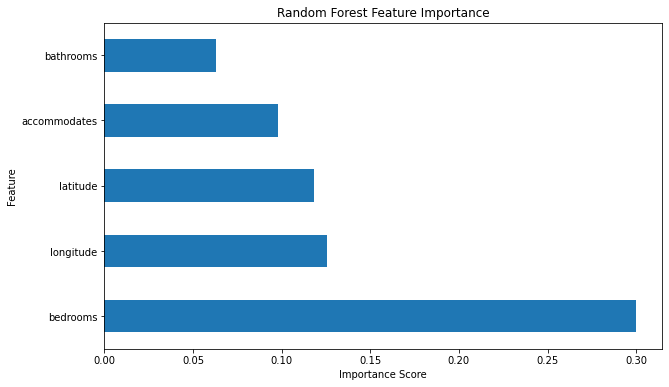

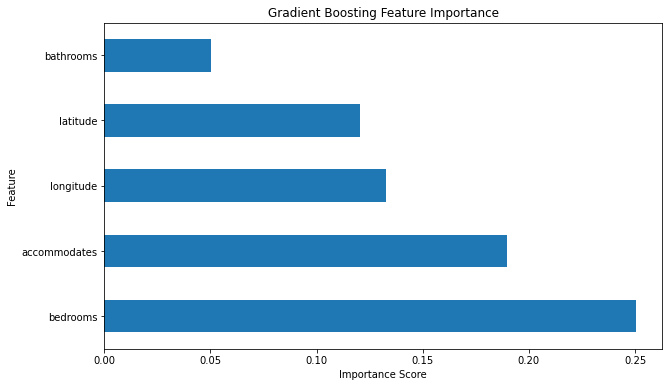

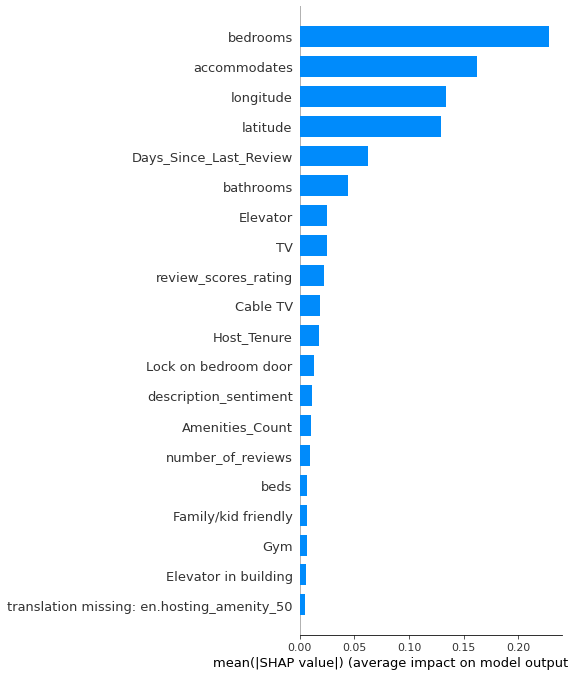

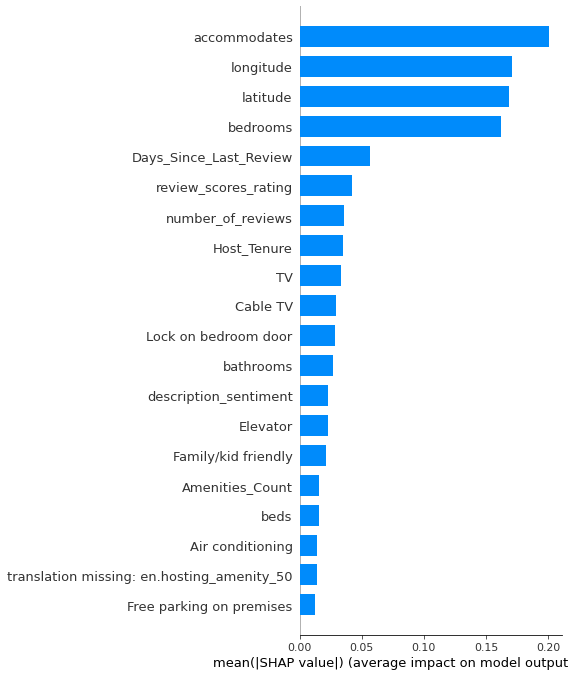

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
import shap

# Load the dataset
homestays_df =data
# Exclude 'id' column from features
numeric_columns = homestays_df.select_dtypes(include=['float', 'int']).columns.tolist()
numeric_columns.remove('id')

# Exclude 'log_price' from features
numeric_columns.remove('log_price')

X = homestays_df[numeric_columns]
y = homestays_df['log_price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train Random Forest model with best parameters
random_forest = RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)
random_forest.fit(X_train_imputed, y_train)

# Train Gradient Boosting model with best parameters
gradient_boosting = GradientBoostingRegressor(learning_rate=0.3, max_depth=7, n_estimators=300, random_state=42)
gradient_boosting.fit(X_train_imputed, y_train)

# Feature Importance for Random Forest
plt.figure(figsize=(10, 6))
feat_importances_rf = pd.Series(random_forest.feature_importances_, index=X.columns)
feat_importances_rf.nlargest(5).plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Feature Importance for Gradient Boosting
plt.figure(figsize=(10, 6))
feat_importances_gb = pd.Series(gradient_boosting.feature_importances_, index=X.columns)
feat_importances_gb.nlargest(5).plot(kind='barh')
plt.title('Gradient Boosting Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# SHAP Values for Random Forest
explainer_rf = shap.Explainer(random_forest)
shap_values_rf = explainer_rf.shap_values(X_test_imputed)
shap.summary_plot(shap_values_rf, X_test_imputed, plot_type='bar', feature_names=X.columns)

# SHAP Values for Gradient Boosting
explainer_gb = shap.Explainer(gradient_boosting)
shap_values_gb = explainer_gb.shap_values(X_test_imputed)
shap.summary_plot(shap_values_gb, X_test_imputed, plot_type='bar', feature_names=X.columns)


In [49]:
# Extract top features for Random Forest
top_features_rf = feat_importances_rf.nlargest(10).reset_index()
top_features_rf.columns = ['Feature', 'Importance Score (RF)']
top_features_rf['Rank (RF)'] = range(1, len(top_features_rf) + 1)

# Extract top features for Gradient Boosting
top_features_gb = feat_importances_gb.nlargest(10).reset_index()
top_features_gb.columns = ['Feature', 'Importance Score (GB)']
top_features_gb['Rank (GB)'] = range(1, len(top_features_gb) + 1)

# Merge top features from both models
top_features = pd.merge(top_features_rf, top_features_gb, on='Feature', how='outer')


# Display top features in tabular format
print("Top Features:")
print(top_features.to_string(index=False))


Top Features:
               Feature  Importance Score (RF)  Rank (RF)  Importance Score (GB)  Rank (GB)
              bedrooms               0.299733          1               0.250339          1
             longitude               0.125430          2               0.132620          3
              latitude               0.118323          3               0.120650          4
          accommodates               0.097837          4               0.189750          2
             bathrooms               0.062889          5               0.050113          5
           Host_Tenure               0.035617          6               0.028483          7
Days_Since_Last_Review               0.035210          7               0.034488          6
 description_sentiment               0.032490          8               0.026787          8
       Amenities_Count               0.019575          9               0.013659         10
  review_scores_rating               0.015284         10               0.014

# Top Features Analysis Report

## Introduction
This report presents the top features and their importance scores obtained from analyzing the Random Forest (RF) and Gradient Boosting (GB) models trained on homestay data. The importance scores represent the relative impact of each feature on predicting the log prices of homestays.

## Top Features
The table below shows the top features ranked by importance score for both RF and GB models:

| Rank (RF) | Feature                 | Importance Score (RF) | Rank (GB) | Importance Score (GB) |
|-----------|-------------------------|-----------------------|-----------|-----------------------|
| 1         | bedrooms                | 0.2997                | 1         | 0.2503                |
| 2         | longitude               | 0.1254                | 3         | 0.1326                |
| 3         | latitude                | 0.1183                | 4         | 0.1207                |
| 4         | accommodates            | 0.0978                | 2         | 0.1898                |
| 5         | bathrooms               | 0.0629                | 5         | 0.0501                |
| 6         | Host_Tenure             | 0.0356                | 7         | 0.0285                |
| 7         | Days_Since_Last_Review | 0.0352                | 6         | 0.0345                |
| 8         | description_sentiment   | 0.0325                | 8         | 0.0268                |
| 9         | Amenities_Count         | 0.0196                | 10        | 0.0137                |
| 10        | review_scores_rating    | 0.0153                | 9         | 0.0143                |

## Insights
- **Bedrooms** are the most influential feature in both RF and GB models, indicating that the number of bedrooms significantly impacts homestay prices.
- **Longitude** and **latitude** also play important roles, suggesting that location is a key factor in determining prices.
- **Accommodates** ranks high in both models, highlighting the importance of the property's capacity in influencing prices.
- **Bathrooms**, **Host_Tenure**, and **Days_Since_Last_Review** show moderate importance, indicating their contribution to pricing decisions.
- **Description_sentiment**, **Amenities_Count**, and **review_scores_rating** have relatively lower importance scores but still contribute to the overall prediction.

## Conclusion
Understanding the significance of these features can help stakeholders make informed decisions regarding pricing strategies, property management, and customer satisfaction. Further analysis and interpretation of these insights can lead to improved pricing models and better-informed business decisions.


# Predictive Performance Assessment

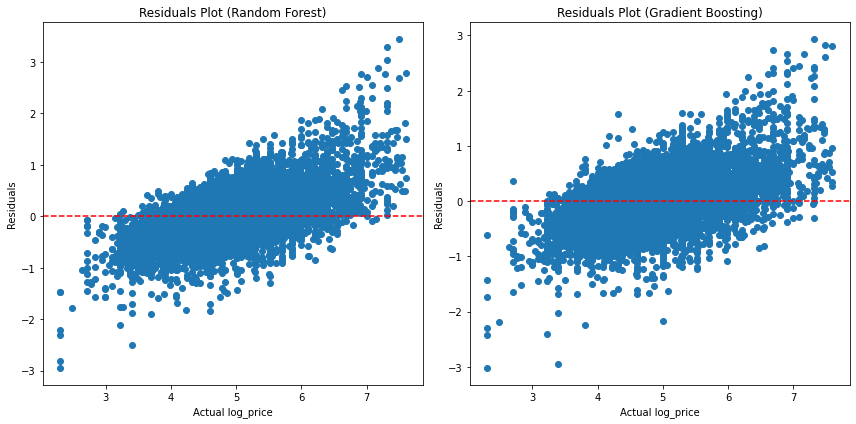

Random Forest Model:
RMSE: 0.42
R-squared: 0.6616

Gradient Boosting Model:
RMSE: 0.42
R-squared: 0.6579


In [52]:
from sklearn.metrics import mean_squared_error, r2_score

# Use the trained model (random_forest or gradient_boosting) on the reserved test set
y_pred_rf = random_forest.predict(X_test_imputed)  # Assuming random_forest is the final model
y_pred_gb = gradient_boosting.predict(X_test_imputed)  # Assuming gradient_boosting is the final model

# Evaluate RMSE and R-squared for Random Forest model
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

# Evaluate RMSE and R-squared for Gradient Boosting model
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)

# Analyze residuals
residuals_rf = y_test - y_pred_rf
residuals_gb = y_test - y_pred_gb

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals_rf)
plt.title('Residuals Plot (Random Forest)')
plt.xlabel('Actual log_price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals_gb)
plt.title('Residuals Plot (Gradient Boosting)')
plt.xlabel('Actual log_price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

# Print evaluation metrics
print("Random Forest Model:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R-squared: {r2_rf:.4f}")
print()
print("Gradient Boosting Model:")
print(f"RMSE: {rmse_gb:.2f}")
print(f"R-squared: {r2_gb:.4f}")
